<a href="https://colab.research.google.com/github/nandikonda-vishal21/DEEP-LEARNING/blob/main/neural_networks_nn21p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEEP NEURAL NETWORK**

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense
import numpy as np

In [21]:
# importing dataset
from keras.datasets import mnist
data = mnist.load_data()

In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

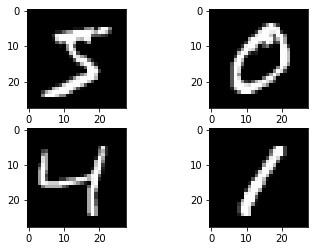

In [23]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(x_train[0], cmap = plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap = plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap = plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap = plt.get_cmap('gray'))
# show the plot
plt.show()

In [24]:
x_train[0].shape

(28, 28)

In [25]:
x_train = x_train.reshape((x_train.shape[0],28*28)).astype('float32')
x_test = x_test.reshape((x_test.shape[0],28*28)).astype('float32')

In [26]:
# normalizing values from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

In [27]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
num_classes

10

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [29]:
model = Sequential()
model.add(Dense(32, input_dim = 28*28, activation = 'relu')) # hidden layer 1
model.add(Dense(64, activation = 'relu')) # hidden layer 2
model.add(Dense(10, activation = 'softmax')) # output layer , 10 = number of classes

In [30]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(x_train, y_train, validation_split = 0.2, epochs = 10, batch_size = 100)

Epoch 1/10
480/480 [==============================] - 2s 3ms/step - loss: 0.8602 - accuracy: 0.7469 - val_loss: 0.2345 - val_accuracy: 0.9332
Epoch 2/10
480/480 [==============================] - 1s 3ms/step - loss: 0.2306 - accuracy: 0.9335 - val_loss: 0.1895 - val_accuracy: 0.9469
Epoch 3/10
480/480 [==============================] - 1s 2ms/step - loss: 0.1826 - accuracy: 0.9474 - val_loss: 0.1576 - val_accuracy: 0.9548
Epoch 4/10
480/480 [==============================] - 1s 2ms/step - loss: 0.1490 - accuracy: 0.9572 - val_loss: 0.1484 - val_accuracy: 0.9572
Epoch 5/10
480/480 [==============================] - 1s 2ms/step - loss: 0.1298 - accuracy: 0.9623 - val_loss: 0.1368 - val_accuracy: 0.9597
Epoch 6/10
480/480 [==============================] - 1s 2ms/step - loss: 0.1081 - accuracy: 0.9693 - val_loss: 0.1313 - val_accuracy: 0.9603
Epoch 7/10
480/480 [==============================] - 1s 2ms/step - loss: 0.1011 - accuracy: 0.9687 - val_loss: 0.1233 - val_accuracy: 0.9643
Epoch 

In [34]:
scores = model.evaluate(x_test, y_test)
print(scores)

313/313 [==============================] - 1s 1ms/step - loss: 0.1044 - accuracy: 0.9688
[0.10437323898077011, 0.9688000082969666]


In [35]:
predictions = model.predict(x_test)
label = []
for pred in predictions:
  max_val = max(pred)
  for (i,p) in enumerate(pred):
    if(p == max_val):
      label.append(i)

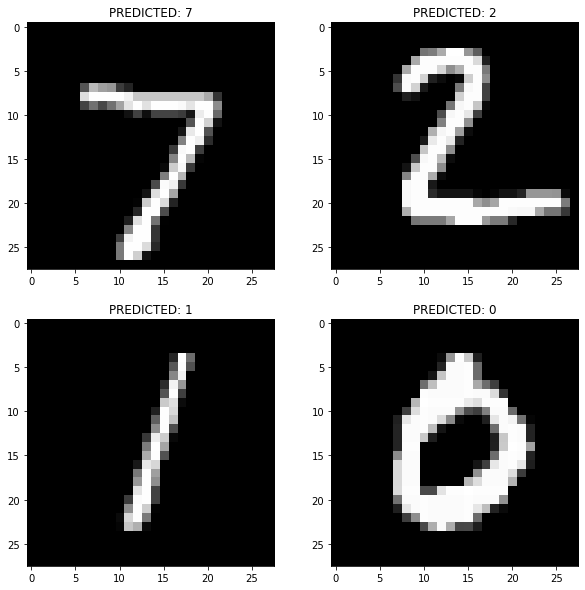

In [36]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(x_test[0].reshape(28,28), cmap = plt.get_cmap('gray'))
plt.title(f'PREDICTED: {label[0]}')
plt.subplot(222)
plt.imshow(x_test[1].reshape(28,28), cmap = plt.get_cmap('gray'))
plt.title(f'PREDICTED: {label[1]}')
plt.subplot(223)
plt.imshow(x_test[2].reshape(28,28), cmap = plt.get_cmap('gray'))
plt.title(f'PREDICTED: {label[2]}')
plt.subplot(224)
plt.imshow(x_test[3].reshape(28,28), cmap = plt.get_cmap('gray'))
plt.title(f'PREDICTED: {label[3]}')
# show the plot
plt.show()